## Example 3 - PM levels  <a class="anchor" id="TOC8"></a>

In this example I will show how to correct for diffusion losses, convert from number to mass concentrations, determine PM levels, and plot the PM levels from an Aerodynamic Particle Sizer file (TSI APS 3321). 

No zeros, continuing
No zeros, continuing
PM0.1 is smaller than all size bins, so it will not be included in the output array


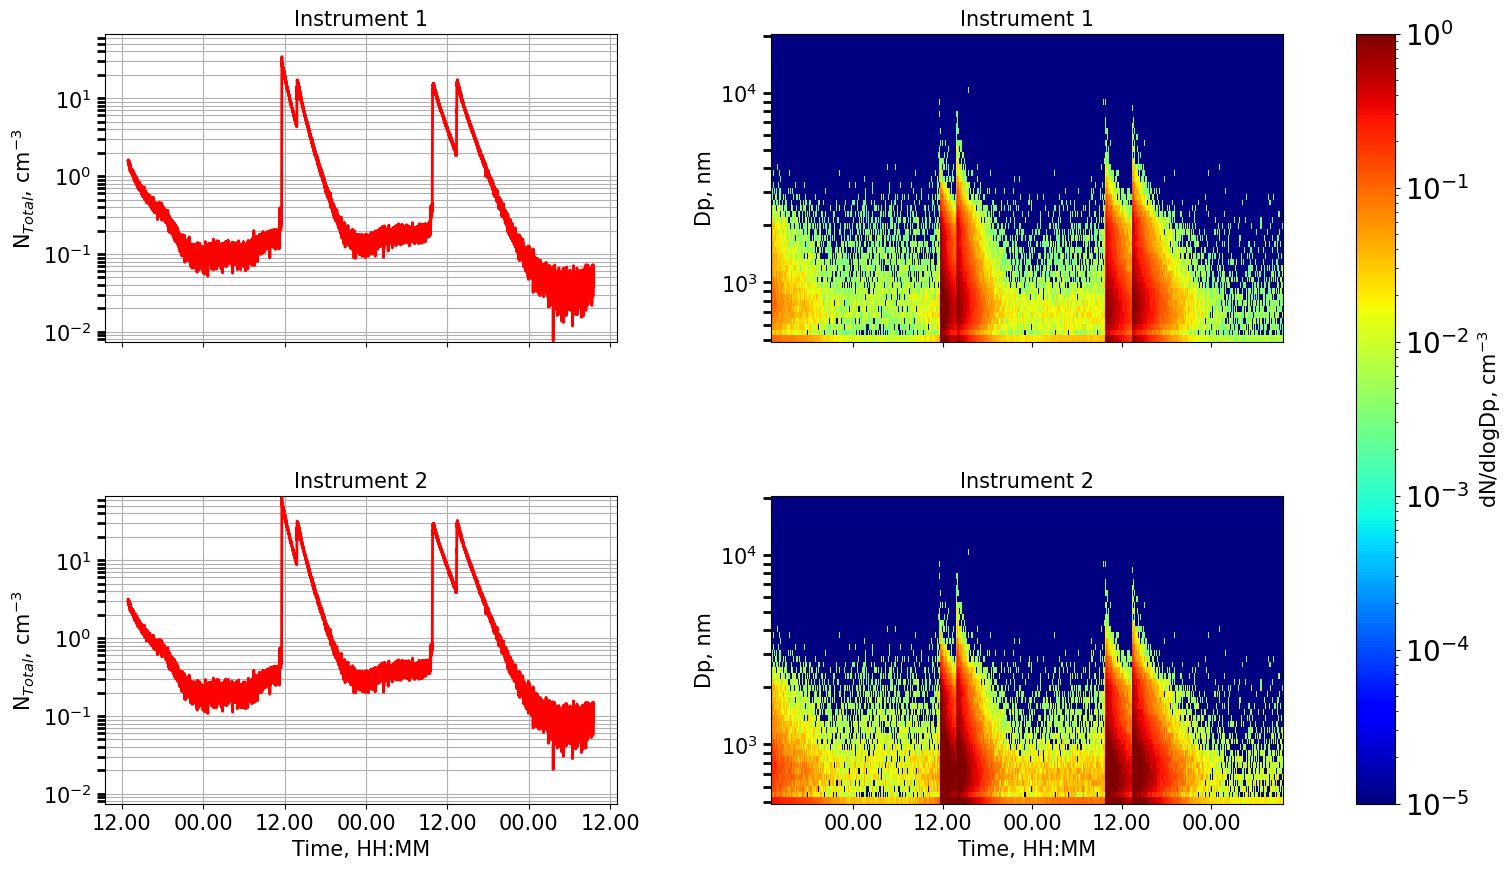

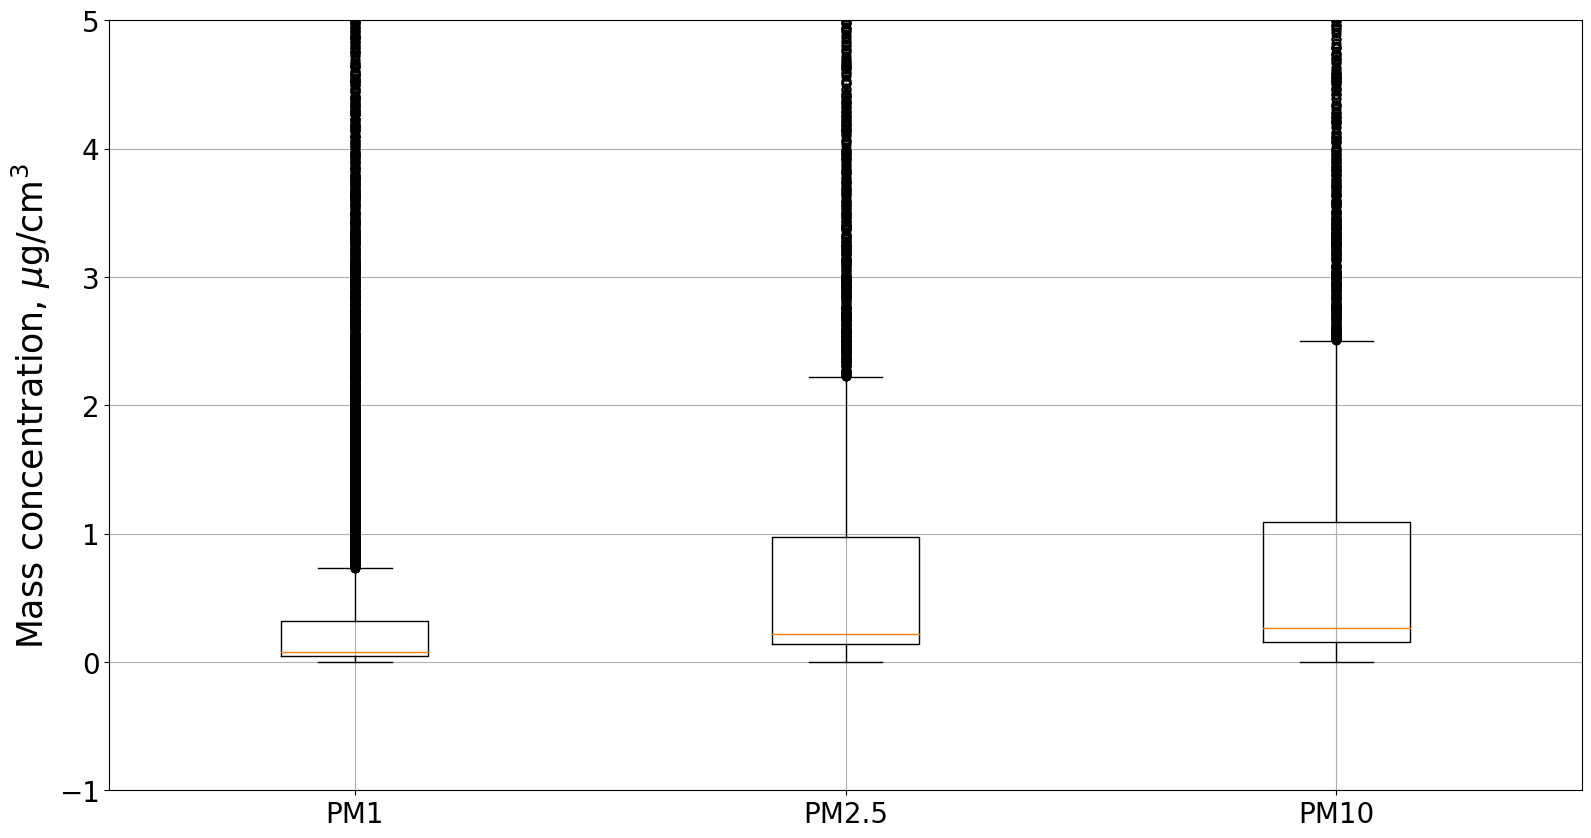

In [6]:
import NFA_Aerosol.Instrument_Lib as IL
import NFA_Aerosol.Plot_Lib as PL
import NFA_Aerosol.Utility_Lib as UL
import datetime as datetime

file = r"Example Data\APS_1.TXT"

d_aero, bin_aero, header_aero, d_optic, bin_optic, header_optic = IL.Load_APS(file)

data_dN = UL.Unnormalize_dndlogdp(d_aero,bin_aero)

bin_mids = header_aero[2:] # nm
Tube_diameter = 0.00635 # diameter of 1/4" tubing in meters
Tube_length = 400 # meters
Flow = 0.02 # L/min

data_corrected, Penetration_ratio = UL.Diffusion_loss(data_dN, bin_mids, Tube_diameter, Tube_length, Flow)

PL.Plot_timeseries_multiple([data_dN,data_corrected],bin_aero,y_3d=(1e-5,1),sharex=1)

rho = 1.4 # g/cm3
data_mass = UL.num2mass(data_corrected,bin_mids,density=rho) # ug/m3

PM_data,header_PM = UL.PM_calc(data_mass,bin_aero,0.1, 1, 2.5, 10)

fig, ax = PL.Boxplot_PM(PM_data,header_PM,y_lim=(-1,5),tick_dist=1)

#### Example 3 in detail

We will now go through each line of code and determine what they do.

Initially we import the NFA Python library and the datetime script, as we will also work with times and dates here. We then specidy a start and end time as datetime objects and we pass these along with the path to the APS file to the IL.Load_APS function. As the APS measures both the aerodynamic size and an optical size, the function returns more than most of the other Load_xxx functions, namely a data, bin_edges, and header object first for the aerodynamic and then the optical data.

In [ ]:
start = datetime.datetime(2019,7,17,8,0,0)
end = datetime.datetime(2019,7,17,16,0,0)
file = r"Example Data\APS_5.TXT"

d_aero, bin_aero, header_aero, d_optic, bin_optic, header_optic = IL.Load_APS(file,start,end)

This particular dataset was exported as normalized dN/dlogDp values, so we initially unnormalize to get the actual number concentration

In [ ]:
data_dN = UL.Unnormalize_dndlogdp(d_aero,bin_aero)

We then want to correct for diffusion losses in the tubing that we used. To do so we use the UL.Diffusion_loss function, which take the particle bin midpoints in nm, tube diameter in meters, tube length in meters, and flow in l/min. Normally these losses are only relevant for small particles, below the sizes measured by the APS. To see an effect we therefore specify a tube length of 400 m and a very low flow of 0.02 l/min in 1/4" tubing. This gives a significant change in the aerosol number concentration, which we would not see under less extreme conditions, as the particle penetration fraction (fraction of particles coming through the tube) would be close to 1.

In [ ]:
bin_mids = header_aero[2:] # nm
Tube_diameter = 0.00635 # diameter of 1/4" tubing in meters
Tube_length = 400 # meters
Flow = 0.02 # L/min

data_corrected, Penetration_ratio = UL.Diffusion_loss(data_dN, bin_mids, Tube_diameter, Tube_length, Flow)

To see the effect of the diffusion loss correction we plot the two dataseries in the same plot with the PL.Plot_timeseries_multiple function as seen previously.

In [ ]:
PL.Plot_timeseries_multiple([data_dN,data_corrected],bin_aero,y_3d=(1,0),sharex=1)

Having corrected for diffusion losses, we now convert from number concentration to mass concentration, assuming a density of 1.4 g/cm3, with the UL.num2mass function, which takes a dataset, midpoints of particle bins, and a density:

In [ ]:
rho = 1.4 # g/cm3
data_mass = UL.num2mass(data_corrected,bin_mids,density=rho) # ug/m3

Now the the particle data is in µg/m3 we can calculate the PM levels using the UL.PM_calc function. The function takes a dataset in mass concentration, limits of the particle size bins in nm as returned from the IL.Load_xxx functions, and a or several numbers corresponding to the desired PM fraction. Here we pass 0.1, 1, 2.5, and 10 to the function, meaning that it will give us the PM0.1, PM1, PM2.5, and PM10 for each measurement point in the dataset.

When we run the script you can see that the function outputs: "PM0.1 is smaller than all size bins, so it will not be included in the output array", which is because the lowest APS bin is 487 nm, and thus above the PM0.1 limit.

In [ ]:
PM_data,header_PM = UL.PM_calc(data_mass,bin_aero,0.1, 1, 2.5, 10)

Finally we visualize the PM levels as a boxplot, where we specify a the y axis limits from -1 to 5 with a tick spacing of 1.

In [ ]:
fig, ax = PL.Boxplot_PM(PM_data,header_PM,y_lim=(-1,5),tick_dist=1)

The thick black lines above the boxes are due to numerous outliers